<a href="https://colab.research.google.com/github/Nzaya/Image-Steganography-using-Python/blob/master/Image_Steganography_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries

import numpy as np
import cv2
import types
from google.colab.patches import cv2_imshow #Colab crashes when you try to display image using cv2,imshow() thus use this

Define a function to convert any type of data into binary, we will use this to convert the secret data and pixel values to binary in the encoding and decoding phase.

In [5]:
def messageToBinary(message):
  if type(message) == str:
    return ''.join([ format(ord(i), "08b") for i in message ])
  elif type(message) == bytes or type(message) == np.ndarray:
    return [ format(i, "08b") for i in message ]
  elif type(message) == int or type(message) == np.uint8:
    return format(message, "08b")
  else:
    raise TypeError("Input type not supported")

Write a function to hide secret message into the image by altering the LSB

In [11]:
# Function to hide the secret message into the image

def hideData(image, secret_message):

  # calculate the maximum bytes to encode
  n_bytes = image.shape[0] * image.shape[1] * 3 // 8
  print("Maximum bytes to encode:", n_bytes)

  #Check if the number of bytes to encode is less than the maximum bytes in the image
  if len(secret_message) > n_bytes:
      raise ValueError("Error encountered insufficient bytes, need bigger image or less data !!")
  
  secret_message += "#####" # you can use any string as the delimeter

  data_index = 0
  # convert input data to binary format using messageToBinary() fucntion
  binary_secret_msg = messageToBinary(secret_message)

  data_len = len(binary_secret_msg) #Find the length of data that needs to be hidden
  for values in image:
      for pixel in values:
          # convert RGB values to binary format
          r, g, b = messageToBinary(pixel)
          # modify the least significant bit only if there is still data to store
          if data_index < data_len:
              # hide the data into least significant bit of red pixel
              pixel[0] = int(r[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index < data_len:
              # hide the data into least significant bit of green pixel
              pixel[1] = int(g[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index < data_len:
              # hide the data into least significant bit of  blue pixel
              pixel[2] = int(b[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          # if data is encoded, just break out of the loop
          if data_index >= data_len:
              break

  return image

Define a function to decode the hidden message from the stego image


In [13]:
def showData(image):

  binary_data = ""
  for values in image:
      for pixel in values:
          r, g, b = messageToBinary(pixel) #convert the red,green and blue values into binary format
          binary_data += r[-1] #extracting data from the least significant bit of red pixel
          binary_data += g[-1] #extracting data from the least significant bit of green pixel
          binary_data += b[-1] #extracting data from the least significant bit of blue pixel
  # split by 8-bits
  all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
  # convert from bits to characters
  decoded_data = ""
  for byte in all_bytes:
      decoded_data += chr(int(byte, 2))
      if decoded_data[-5:] == "#####": #check if we have reached the delimeter which is "#####"
          break
  #print(decoded_data)
  return decoded_data[:-5] #remove the delimeter to show the original hidden message

Function that takes the input image name and secret message as input from user and calls hideData() to encode the message

In [20]:
def encode_text():
  image_name= input("Enter image name(with extension): ")
  image = cv2.imread(image_name) #REad the input image using OpenCv-Puthon
  #It is a library of python bindings designed to solve computer vision problems

  #Details of the image
  print("THe shape of the image is: ",image.shape) #Check the shape of the image to calculate the number of bytes in it
  print("THe original image is as shown below: ")
  resized_image = cv2.resize(image, (500,500)) #REsize the image as per your requirement
  cv2_imshow(resized_image) #Display the image

  data = input("Enter data to be encided; ")
  if (len(data) == 0):
    raise VAlueError('Data is empty')

  filename = input("Enter the name of new encoded image(with extension): ")
  encoded_image = hideData(image, data) # Call the hideData function to hide the secret message into the selected image
  cv2.imwrite(filename, encoded_image)

Create a function to ask user to enter the name of the image that needs to be decoded and call the showData() function to return the decoded message.


In [21]:
#Decode the data in the image

def decode_text():
  #Read the image that contains the hidden image
  image_name = input("Enter the name of the steganographed image that you want to decode(with extendion): ")
  image = cv2.imread(image_name) #Read the image using cv2.imread()

  print("The Steganographed image is as shown below: ")
  resized_image = cv2.resize(image, (500,500)) #Resize the original image as per your requirement
  cv2_imshow(resized_image) #Display the Steganographed image

  text = showData(image)
  return text

Main Function()

Image Steganography 
 1. Encode the data 
 2. Decode the data 
 Your input is: 1

Encoding....
Enter image name(with extension): /content/thumb-up-emoticon-with-medical-mask-vector-30108557.png
THe shape of the image is:  (1042, 1000, 3)
THe original image is as shown below: 


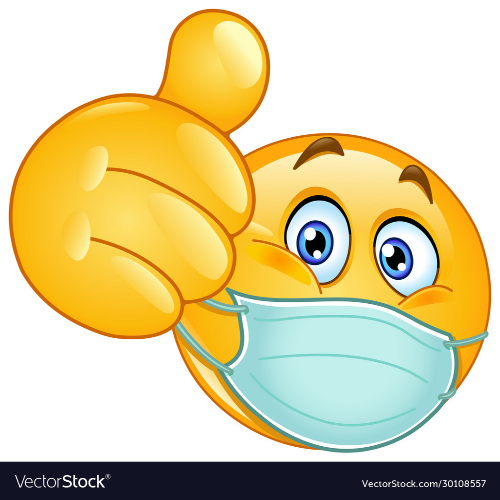

Enter data to be encided; Wash your hands
Enter the name of new encoded image(with extension): test_encoded.png
Maximum bytes to encode: 390750


In [24]:
# Image Steganography         
def Steganography(): 
    a = input("Image Steganography \n 1. Encode the data \n 2. Decode the data \n Your input is: ")
    userinput = int(a)
    if (userinput == 1):
      print("\nEncoding....")
      encode_text() 
          
    elif (userinput == 2):
      print("\nDecoding....") 
      print("Decoded message is " + decode_text()) 
    else: 
        raise Exception("Enter correct input") 
          
Steganography() #encode image

Image Steganography 
 1. Encode the data 
 2. Decode the data 
 Your input is: 2

Decoding....
Enter the name of the steganographed image that you want to decode(with extendion): /content/test_encoded.png
The Steganographed image is as shown below: 


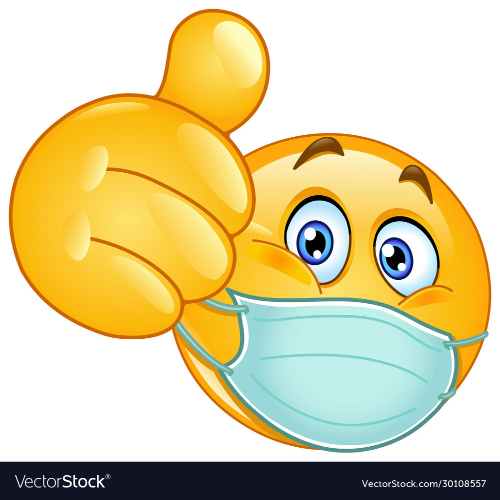

Decoded message is Wash your hands


In [25]:
Steganography() #decode image